In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import make_blobs
import seaborn as sns
plt.style.use('seaborn')

In [2]:
df = pd.read_stata('WoON2015small.dta')

C:\Users\jabor\AppData\Roaming\Python\Python38\site-packages\pandas\io\stata.py:1433: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [3]:
df=df[['Verh', 'LftOP', 'VltOplOP', 'etniop3', 'WOZwaarde', 'huko', 'g4_5']]
df.dropna(inplace=True)
df.head(30)

,Verh,LftOP,VltOplOP,etniop3,WOZwaarde,huko,g4_5
0,niet verhuisgeneigd,20,"HAVO, VWO, MBO",Native Dutch,189000,Rental,Amsterdam
1,verhuisgeneigd,21,"HAVO, VWO, MBO",Native Dutch,783000,Rental,Utrecht
2,verhuisgeneigd,27,"HBO, Universiteit",Native Dutch,206000,Rental,Utrecht
3,niet verhuisgeneigd,57,lbo,Western,324000,Owner-Occupied,Utrecht
4,verhuisgeneigd,70,"MAVO, MULO, VMBO",Native Dutch,215000,Owner-Occupied,Utrecht
5,niet verhuisgeneigd,50,"MAVO, MULO, VMBO",Native Dutch,424000,Owner-Occupied,Utrecht
6,niet verhuisgeneigd,60,"HAVO, VWO, MBO",Native Dutch,169000,Rental,Utrecht
8,verhuisgeneigd,38,"HBO, Universiteit",Native Dutch,201000,Owner-Occupied,Utrecht
9,verhuisgeneigd,19,"HAVO, VWO, MBO",Native Dutch,199000,Rental,Utrecht
10,verhuisgeneigd,28,"HBO, Universiteit",Native Dutch,238000,Rental,Utrecht


In [4]:
df['VltOplOP'].value_counts()

HBO, Universiteit    3129
HAVO, VWO, MBO       2052
Lager onderwijs       633
lbo                   588
MAVO, MULO, VMBO      560
Anders                130
Name: VltOplOP, dtype: int64

In [5]:
df.describe()

,LftOP,WOZwaarde
count,7092.000000,7.092000e+03
mean,47.280034,1.963681e+05
std,17.882843,1.391349e+05
min,18.000000,1.200000e+04
25%,32.000000,1.170000e+05
50%,46.000000,1.630000e+05
75%,61.000000,2.290000e+05
max,98.000000,2.495500e+06


In [6]:
df=df[(df['Verh']!='huisv gevonden')]
df=df[(df['Verh']!='gedwongen verhuizing')]
df['Verh'].value_counts()

niet verhuisgeneigd     3660
verhuisgeneigd          3235
gedwongen verhuizing       0
huisv gevonden             0
Name: Verh, dtype: int64

In [7]:
df['huko'] = pd.get_dummies(df['huko'])
dummies_etni = pd.get_dummies(df['etniop3'], drop_first=True)
df=df.drop(df[df['VltOplOP']=='Anders'].index)
df.replace('Lager onderwijs', value=0, inplace=True)
df.replace('lbo', value=1, inplace=True)
df.replace('MAVO, MULO, VMBO', value=1, inplace=True)
df.replace('HAVO, VWO, MBO', value=2, inplace=True)
df.replace('HBO, Universiteit', value=3, inplace=True)
df['VltOplOP'].value_counts()

3         3009
2         2005
1         1130
0          624
Anders       0
Name: VltOplOP, dtype: int64

In [8]:
dummies_city = pd.get_dummies(df['g4_5'], drop_first=True)
dummies_city

,s-Gravenhage,Rotterdam,Utrecht
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
7784,1,0,0
7785,1,0,0
7786,1,0,0
7787,1,0,0


In [9]:
df_X = df[['LftOP', 'WOZwaarde', 'huko', 'VltOplOP']]
df_X[['Non-Western', 'Western']]=dummies_etni[['Non-Western', 'Western']]
df_X[['s-Gravenhage', 'Rotterdam', 'Utrecht']]=dummies_city[['s-Gravenhage', 'Rotterdam', 'Utrecht']]
df_X

C:\Users\jabor\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,LftOP,WOZwaarde,huko,VltOplOP,Non-Western,Western,s-Gravenhage,Rotterdam,Utrecht
0,20,189000,0,2,0,0,0,0,0
1,21,783000,0,2,0,0,0,0,1
2,27,206000,0,3,0,0,0,0,1
3,57,324000,1,1,0,1,0,0,1
4,70,215000,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
7784,42,66000,0,1,1,0,1,0,0
7785,79,106000,0,3,0,0,1,0,0
7786,72,90000,0,2,0,0,1,0,0
7787,22,81000,0,2,0,0,1,0,0


In [10]:
X = df_X # Baseline = rental , wants to move, Amsterdam
Y = pd.get_dummies(df['Verh'])
X = sm.add_constant(X.astype(float)) # adding a constant
Y

,verhuisgeneigd,huisv gevonden,gedwongen verhuizing,niet verhuisgeneigd
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
7784,1,0,0,0
7785,1,0,0,0
7786,0,0,0,1
7787,1,0,0,0


In [11]:
model = sm.Logit(Y['verhuisgeneigd'].astype(float), X.astype(float)).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

Optimization terminated successfully.
         Current function value: 0.595993
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         verhuisgeneigd   No. Observations:                 6768
Model:                          Logit   Df Residuals:                     6758
Method:                           MLE   Df Model:                            9
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:                  0.1381
Time:                        18:05:12   Log-Likelihood:                -4033.7
converged:                       True   LL-Null:                       -4680.0
Covariance Type:            nonrobust   LLR p-value:                1.230e-272
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0966      0.143     14.711      0.000       1.817       2.376
LftOP           -0.0457

<AxesSubplot:xlabel='LftOP', ylabel='Verh'>

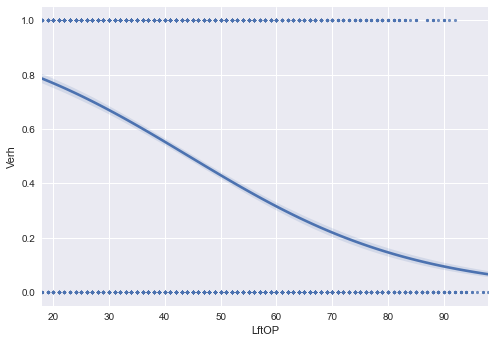

In [16]:
df_X['Verh']=Y['verhuisgeneigd']
sns.regplot(x="LftOP", y="Verh", data=df_X, logistic=True, scatter_kws={"s": 10})
# sns.regplot(x="g4_5", y="Verh", data=df_X, logistic=True)

In [ ]:
sns.lmplot( x="WOZwaarde", y="LftOP", data=df, fit_reg=False, hue='g4_5', legend=True, scatter_kws={"s": 20})
